In [5]:
#D12 Task 1

# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Load the data
df = pd.read_csv('churn_clean.csv')  

# Display info
print(df.head())  
print(df[['MonthlyCharge', 'Bandwidth_GB_Year','Income', 'Outage_sec_perweek']].describe())
print(df[['MonthlyCharge', 'Bandwidth_GB_Year','Income', 'Outage_sec_perweek']].info())


   CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   
2  f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR                Yamhill   
3  dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA              San Diego   
4  aabb64a116e83fdc4befc1fbab1663f9    Needville    TX              Fort Bend   

     Zip       Lat        Lng  ...  MonthlyCharge Bandwidth_GB_Year Item1  \
0  99927  56.25100 -133.37571  ...     

In [6]:
#C3
# Selecting variables 
clustering_data = df[['MonthlyCharge', 'Bandwidth_GB_Year', 'Income', 'Outage_sec_perweek']]

# Standardizing the variables
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)
scaled_df = pd.DataFrame(scaled_data, columns=clustering_data.columns)

#C4
# Saving the data
scaled_df.to_csv('Prep_data.csv', index=False)


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.11 is maybe too old for this OS.
  warnings.warn(
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_km

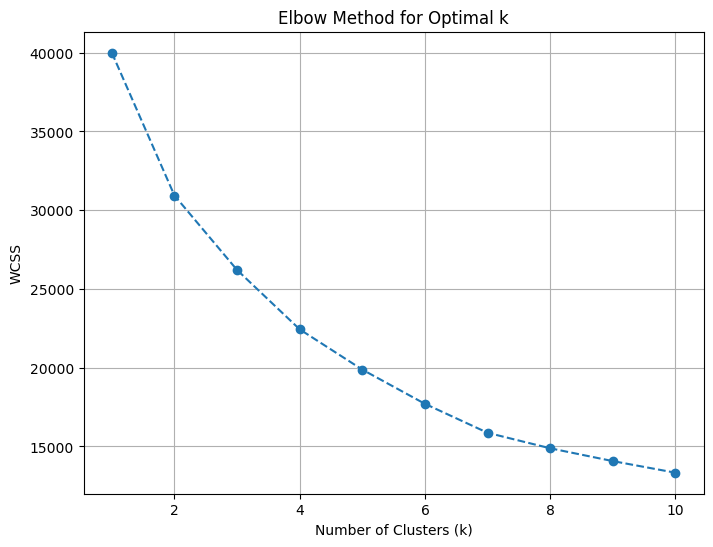

0    4203
2    4201
1    1596
Name: Cluster, dtype: int64


<ipython-input-3-f39771b8e7df>:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = df.groupby('Cluster').mean()


           CaseOrder           Zip        Lat        Lng   Population  \
Cluster                                                                 
0        2535.266952  49003.246729  38.805061 -90.757493  9854.284321   
1        4939.305138  49626.501253  38.767481 -91.133818  9322.439223   
2        7490.155201  49123.697691  38.706284 -90.674136  9823.721495   

         Children        Age        Income  Outage_sec_perweek      Email  \
Cluster                                                                     
0        2.076136  52.871758  30149.725446           10.049410  12.074471   
1        2.070802  52.887218  89934.397939            9.784757  11.947995   
2        2.105689  53.357772  30424.820888           10.036739  11.983337   

         ...  MonthlyCharge  Bandwidth_GB_Year     Item1     Item2     Item3  \
Cluster  ...                                                                   
0        ...     172.585247        1303.486422  3.510826  3.500119  3.482275   
1       

In [3]:
#D1

# sum of squares
wcss = []

# Determining WCSS
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

#D2
# Optimal number of clusters (Saji, 2023)
optimal_k = 3  

# Performing k-means clustering
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

# Adding the cluster labels 
df['Cluster'] = clusters

# Displaying the count of customers in each cluster
print(df['Cluster'].value_counts())

# Cluster summary
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


In [14]:
#E1
#Calculate silhouette score

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

silhouette_avg = silhouette_score(scaled_df, clusters)
print("silhouette score", silhouette_avg)


The average silhouette_score is : 0.24921886807390292
